# AirBnB Project


## Function 1: CSV File Reader
Before you can even begin to perform any data analysis, the first thing you have to do is to read the data from CSV and store the data in a suitable python data structure. Make use of the methods learnt from the previous class to retrieve the data from the CSV file, and thereafter, store all the data in a list of dictionary. Each row of data that has been stored as a dictionary should be appended to a list.

You may refer to the assignment document to see a sample of the expected data

## Import the CSV library, open and read the data file

> __Note:__ If you are stuck, check out the first code cell of the YouTube lab! That section uses the `csv` library to load the CSV-based data
> 
> Remember, you are expected to read the data into a dictionary!

<h2>Uploading the data to explore and see the data type</h2>

In [20]:
#To import the CSV python package/library
import csv

#the title of the csv
csv_path = "data_airbnb.csv"

#read and open the file
with open(csv_path, newline='', encoding='UTF-8') as f_obj:
    
    reader = csv.reader(f_obj)
    
    #Get the header of the datafile
    header = next(reader)

    #Convert all the data to a list
    list_data = list(reader)
    
#print the header
print(header)
#print the first three rows of data
print(list_data[0:3])


['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city', 'borough', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'last_modified', 'latitude', 'longitude', 'location']
[['1133718', '1280', '6219420', 'Shared room', '', 'Singapore', '', 'MK03', '9', '4.5', '12', '1.0', '', '74.0', '', '2017-05-17 09:10:25.431659', '1.293354', '103.769226', '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'], ['3179080', '1280', '15295886', 'Shared room', '', 'Singapore', '', 'TS17', '15', '5.0', '12', '1.0', '', '77.0', '', '2017-05-17 09:10:24.216548', '1.310862', '103.858828', '0101000020E6100000E738B709F7F659403F1BB96E4AF9F43F'], ['15303457', '1280', '97053568', 'Shared room', '', 'Singapore', '', 'MK05', '0', '0.0', '14', '1.0', '', '60.0', '', '2017-05-17 09:10:16.969900', '1.333744', '103.764612', '0101000020E610000044882B67EFF0594093C7D3F20357F53F']]


<h2>First way of uploading data into a dictionary</h2>

In [21]:
#Create an empty list
dataList = []

#Read the data into a file object
with open(csv_path, newline='', encoding='UTF-8') as f_obj:
    
    #use the csv reader method to process the file
    reader = csv.reader(f_obj)
    
    #Remove the header of the data
    header = next(reader)
    
    #Iterate through the list of data
    for row in reader:
        
        #Create an emppty dictionary
        rowDict = {}
        
        #For every row of data, we set the header as the key and the data as the corresponding value pair
        for i in range (0,len(header)):
            
            
            rowDict[header[i]] = row[i]
        
        #Add the full dictionary into the list of data
        dataList.append(rowDict)

#Print first row of data
print(dataList[0])

#Examine the number of rows of data we have
print(len(dataList))

{'room_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': '9', 'overall_satisfaction': '4.5', 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': '74.0', 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': '1.293354', 'longitude': '103.769226', 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}
7212


<h2>Faster way of uploading data into a list of dictionary</h2>

In [22]:

with open('data_airbnb.csv', newline='', encoding="utf-8") as file:
    reader = csv.DictReader(file)
    data = list(reader)
    print(data[0])
    
data[0]['city']

OrderedDict([('room_id', '1133718'), ('survey_id', '1280'), ('host_id', '6219420'), ('room_type', 'Shared room'), ('country', ''), ('city', 'Singapore'), ('borough', ''), ('neighborhood', 'MK03'), ('reviews', '9'), ('overall_satisfaction', '4.5'), ('accommodates', '12'), ('bedrooms', '1.0'), ('bathrooms', ''), ('price', '74.0'), ('minstay', ''), ('last_modified', '2017-05-17 09:10:25.431659'), ('latitude', '1.293354'), ('longitude', '103.769226'), ('location', '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F')])


'Singapore'

## Function 2: Descriptive Analytics Report Generation
The data team at AirBnB wishes to find out the answers to a few simple questions on the existing rooms in Singapore. Your goal is manipulate the data you have stored in the list of dictionary to generate a report for the following questions:


### 1.What are the *top 10 priciest rooms in Singapore*? List the `room_id` as well as `price`.

> __Note:__ Remember to use appropriate variable data types!
>
> Sorting `['9', '10', '91', '100']` vs sorting `[9, 10, 91, 100]` will give you quite different results!

<h2>First, check the format of the data</h2>
<p>Remember your youtube lab where all data read from csv into python was in string format?</p>

In [23]:
#Check the type for price 
print(dataList[0]['price'])
print(type(dataList[0]['price']))

74.0
<class 'str'>


<h2>Next, We convert the price of of the rooms from str to float type</h2>


In [24]:
#Convert price from str to float
for i in range(0,len(dataList)):
    dataList[i]['price'] = float(dataList[i]['price'])
    
#check if the conversion is done properly    
print(dataList[0]['price'])
print(type(dataList[0]['price']))

#Yay it is

74.0
<class 'float'>


<h2>Now for the super smart method of finding the rooms with the top 10 price!</h2>

In [25]:
#sort list in descending order, if you want to sort a nested list, all you have to do is k[2], with
#the number 2 being the index of the value which you have the sorting to be based on
newlist = sorted(dataList, key=lambda k: k['price'], reverse=True)



print(sorted([10,30,40,60], reverse=True))

#Simply print the first 10 rooms
for i in range(0,10):
    print("Room ID:", newlist[i]['room_id'], "Price: ",newlist[i]['price'])

#Remember this logic and algorithm, its one of the most commonly asked questions in coding interviews

[60, 40, 30, 10]
Room ID: 16395877 Price:  8023.0
Room ID: 9815599 Price:  3309.0
Room ID: 13117403 Price:  3029.0
Room ID: 17794853 Price:  2206.0
Room ID: 14620083 Price:  2164.0
Room ID: 16327246 Price:  2059.0
Room ID: 5775503 Price:  1103.0
Room ID: 12372683 Price:  1029.0
Room ID: 15861144 Price:  1027.0
Room ID: 9020629 Price:  981.0


### 2. Which hosts in Singapore have more than 30 listings. How many of such hosts do we have?

> __Note:__ Each host can have more than one property listed, which in turn has varying number of rooms)


In [26]:
#Can we find a dict of {host_id, #room}?
hostRoomDict = {}

#Loop through the data to get the host_id and initlize the dict with 0
for rec in dataList:
    hostId = rec['host_id']
    hostRoomDict[hostId] = 0

#We want to check if we have double add the room. We create a unique list of proceessedRoom and use it as a check/
processedRoom = []
for rec in dataList:
    #if the room has already been process, we ignore
    if rec['room_id'] in processedRoom:
        pass
    else:
        host_id = rec['host_id']
        hostRoomDict[host_id] += 1
        processedRoom.append(rec['room_id'])
    
#print(hostRoomDict)

nHost = 0
for hostId in hostRoomDict:
    if hostRoomDict[hostId] > 30:
        print("Host ID: ", hostId, "Number of Listing:", hostRoomDict[hostId])
        nHost+=1

print("\n")
print('total:', nHost)


Host ID:  76123088 Number of Listing: 34
Host ID:  882659 Number of Listing: 42
Host ID:  35691521 Number of Listing: 62
Host ID:  31464513 Number of Listing: 48
Host ID:  103759551 Number of Listing: 31
Host ID:  8492007 Number of Listing: 64
Host ID:  1439258 Number of Listing: 39
Host ID:  32184450 Number of Listing: 49
Host ID:  16940959 Number of Listing: 94
Host ID:  20485973 Number of Listing: 53
Host ID:  70290706 Number of Listing: 53
Host ID:  51535991 Number of Listing: 54
Host ID:  70265611 Number of Listing: 54
Host ID:  229339 Number of Listing: 57
Host ID:  101312755 Number of Listing: 53
Host ID:  29420853 Number of Listing: 47
Host ID:  31557326 Number of Listing: 53
Host ID:  38987109 Number of Listing: 53
Host ID:  51549370 Number of Listing: 56
Host ID:  23722617 Number of Listing: 55
Host ID:  10248444 Number of Listing: 60
Host ID:  110565713 Number of Listing: 54
Host ID:  4412979 Number of Listing: 37
Host ID:  83423140 Number of Listing: 55
Host ID:  99329030 N

### 3. What are the different room types, and how many rooms of each room types are there in Singapore?
> __Note:__ If you are stuck, refer to the iterations in-class practices
> We did something logically similar to this, tallying unique values.

In [27]:
#Can we find a dict of {room_type, #room}?
typeRoomDict = {}

#initilize the typeRoomDict with 0
for rec in dataList:
    room_type = rec['room_type']
    typeRoomDict[room_type] = 0

#Inspect the unique room type
print(typeRoomDict)


processedRoom = []
for rec in dataList: 
    #check if the room has been processed
    if rec['room_id'] in processedRoom:
        pass
    else:
        if str(rec['city']).lower() == 'singapore':
            room_type = rec['room_type']
            typeRoomDict[room_type] += 1
    
print(typeRoomDict)

{'Shared room': 0, 'Entire home/apt': 0, 'Private room': 0}
{'Shared room': 308, 'Entire home/apt': 3497, 'Private room': 3407}


### 4. What are the top 10 most reviewed listings? Print the `room_id` and number of `reviews`

> __Note:__ Stuck? Scroll up to [part 1](#1.What-are-the-top-10-priciest-rooms-in-Singapore?-List-the-room_id-as-well-as-price.)!

<h2>Again, we need to check out the format of the review</h2>


In [28]:
#Check how does review looks like
print(type(dataList[0]['reviews']))
print(dataList[0]['reviews'])

<class 'str'>
9


<h2>There is a need to change the review from str format to int format</h2>

In [29]:
#Convert reviews from str to int
for i in range(0,len(dataList)):
    dataList[i]['reviews'] = int(dataList[i]['reviews'])
    
#check if the conversion is done properly    
print(dataList[0]['reviews'])
print(type(dataList[0]['reviews']))


9
<class 'int'>


<h2>Thereafter, we perform the super smart method to find out top 10 most reviewed listings</h2>

In [30]:
#sort list in descending order
newlist = sorted(dataList, key=lambda k: k['reviews'], reverse=True)

for i in range(0,10):
    print(newlist[i]['room_id'],newlist[i]['reviews'])

2009135 195
2357514 162
3586966 160
6534296 157
2129215 157
4108082 152
4917556 150
6815242 145
1982064 141
4069940 139


### 5. What are the top 10 listings with the highest overall satisfaction? Print the `room_id` and the `overall_satisfaction`

> __Note:__ You should be familiar with this [by](#1.What-are-the-top-10-priciest-rooms-in-Singapore?-List-the-room_id-as-well-as-price.) [now](#4.-What-are-the-top-10-most-reviewed-listings?-Print-the-room_id-and-number-of-reviews)!


<h2>Again, we need to check out the format of the satisfaction</h2>


In [31]:
#Check how does review looks like
print(type(dataList[0]['overall_satisfaction']))
print(dataList[0]['overall_satisfaction'])

<class 'str'>
4.5


<h2>We need to convert the format from string to float</h2>

In [32]:
#Convert reviews from str to float
for i in range(0,len(dataList)):
    dataList[i]['overall_satisfaction'] = float(dataList[i]['overall_satisfaction'])
    
#check if the conversion is done properly    
print(dataList[0]['overall_satisfaction'])
print(type(dataList[0]['overall_satisfaction']))

4.5
<class 'float'>


<h2>We sort the list in ascending order and then obtain the top 10</h2>


In [33]:
#sort list in ascending order
newlist = sorted(dataList, key=lambda k: k['overall_satisfaction'], reverse=True)

for i in range(0,10):
    print(newlist[i]['room_id'],newlist[i]['overall_satisfaction'])

3179080 5.0
8626676 5.0
15089063 5.0
10443717 5.0
9928402 5.0
5676325 5.0
16863370 5.0
5289692 5.0
16524551 5.0
15362734 5.0


## Function 3:	Satisfaction Map

The data team at AirBnB wishes to find out which region of Singapore has rooms that people are generally more satisfied with. Any room which has a rating `>4` would indicate a highly satisfactory room, and `>2.5` would indicate an average room. Any rating `<2.5` indicates an unsatisfactory room. The AirBnB team hypothesised that the North-East region of Singapore has more rooms with higher satisfaction rating. As the data team, your goal is to find out whether the hypothesis stands true by providing descriptive analytics to allow the AirBnB team to better visualise the satisfaction levels for the whole of Singapore.

Given the dataset provided to us, each room has a geographical location specified by its latitude and longitude. Latitudes and longitudes can be considered to be merely a set of X and Y coordinates on an axis, where the format follows such a manner e.g. `(1.293354, 103.76922)`. What this means for us is that, geographical locations on a map can be represented easily on a scatter plot. This allows us to make use of our pre-existing knowledge on the construction of scatter plots to build a simple heatmap to visualise the satisfaction levels of different rooms in Singapore!

> __Note:__ Consult existing heatmap-through-scatterplot examples, consider the following resource: http://geodesygina.com/matplotlib.html

<h2>Codes to create heatmap with varying color tones based on ratings</h2>

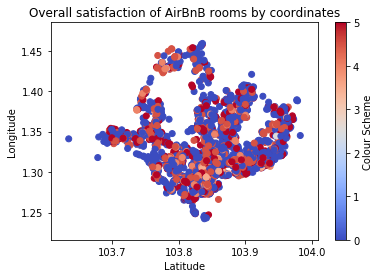

In [34]:
# Remember to import the relevant library/libraries!
import matplotlib.pyplot as plt

# Initialise lat, Lon, and satisfaction as empty lists
lat = []
lon = []
satisfaction = []

# Populate lat, lon and satisfaction lists
for row in dataList:
    satisfaction.append(float(data["overall_satisfaction"]))
    lat.append(float(data["latitude"]))
    lon.append(float(data["longitude"]))

# Some other configurations that we will require for plotting
max_satisfaction = max(satisfaction)
min_satisfaction = min(satisfaction)
color_by = satisfaction

# Add labels to the chart
fig, ax = plt.subplots()

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Overall satisfaction of AirBnB rooms by coordinates")

# Plot the points on the graph, as a scatter plot
s=plt.scatter(lon, # X-axis
            lat, # Y-axis
            c=color_by, # Color based on satisfaction
            cmap = plt.cm.coolwarm, # Color scheme
            vmin=min_satisfaction, # Max value
            vmax=max_satisfaction) # Min value

#Create the color bar
cbar = plt.colorbar(mappable=s, ax=ax)
cbar.set_label("Colour Scheme")

# Show the graph
plt.show()


<h2>Heatmap with only 3 color tones!</h2>

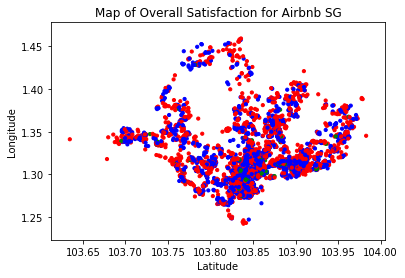

In [36]:
# Codes to create a heatmap based on only 3 color tones!
latlist = []
longlist = []
ovsatlist = []

for a in dataList:
    latlist.append(float(a['latitude']))
for b in dataList:
    longlist.append(float(b['longitude']))
for c in dataList:
    ovsatlist.append(float(c['overall_satisfaction']))
    
import matplotlib.pyplot as plt
import numpy as np
ovsatlist = np.array(ovsatlist)


col = np.where(ovsatlist < 2.5, 'r', np.where(ovsatlist < 4, 'g', 'b'))
plt.scatter(longlist, latlist, c=col, s=10)


plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Map of Overall Satisfaction for Airbnb SG")
plt.show()